# パラメトリック回帰モデル
もし過去の分析の結果から、生存時間に対して特定の分布を適用することができる状況では、より厳密な解析を実施するために、パラメトリックモデルの利用が望ましい。パラメトリックモデルには、以下のような利点がある

 1. **完全最大尤度がパラメータを推定するために使われる**
 2. **推定された回帰係数、またはそれらを変数変換したものは臨床的に意味のある効果の推定値である**
 3. **モデルに当てはめた値は生存時間の推定値を与える**
 4. **残差は時間の観測値と予測値の差として計算できる**

本jupyterでは、パラメトリック回帰モデルの中でもよく使われる指数回帰モデル・Weibull回帰モデルの2つについて紹介する。

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 日本語フォントを設定
font = {'family': 'IPAexGothic'}
mpl.rc('font', **font)

% matplotlib inline

In [2]:
WHAS100_DATASET_PATH = './dataset/whas100.dat'
WHAS100_COLUMNS = ['id', '登録日', '追跡日', '入院期間', '追跡日数', '生存状態', '登録時年齢', '性別', 'BMI']

whas100_df = pd.read_csv(WHAS100_DATASET_PATH, sep='\s+', header=None, index_col=0, names=WHAS100_COLUMNS)
whas100_df

,登録日,追跡日,入院期間,追跡日数,生存状態,登録時年齢,性別,BMI
id,,,,,,,,
1,03/13/1995,03/19/1995,4,6,1,65,0,31.38134
2,01/14/1995,01/23/1996,5,374,1,88,1,22.65790
3,02/17/1995,10/04/2001,5,2421,1,77,0,27.87892
4,04/07/1995,07/14/1995,9,98,1,81,1,21.47878
5,02/09/1995,05/29/1998,4,1205,1,78,0,30.70601
6,01/16/1995,09/11/2000,7,2065,1,82,1,26.45294
7,01/17/1995,10/15/1997,3,1002,1,66,1,35.71147
8,11/15/1994,11/24/2000,56,2201,1,81,1,28.27676
9,08/18/1995,02/23/1996,5,189,1,76,0,27.12082


In [6]:
whas100_df['intercept'] = 1

---
## 指数回帰モデル
指数分布
$$
f\left(t\right) = \theta e^{- \theta t} \qquad (t \ge 0, \theta > 0)
$$


 - $i = 1,2,\cdots,n$
 - $n$: データ数
 - $p$: 特徴量の数
 - ${X}_{i}^{\prime} = \left( x_{i0}, x_{i1}, x_{i2}, \cdots, x_{ip} \right)$。ただし、$x_{i0} = 1$とする(切片)。
 - $\beta = \left( \beta_{0}, \beta_{1}, \beta_{2}, \cdots, \beta_{p} \right)$



**<font color="blue">死亡密度関数</font>**: $\theta = exp\left[ -\left({X}_{i}^{\prime}\beta \right) \right]$として、
$$
f\left( t,x;\beta \right) = e^{\left[ - \left( {X}_{i}^{\prime}\beta \right) - exp\left( y_{i} - {X}_{i}^{\prime}\beta \right) \right]}
$$

 - $y_{i} = \log {t_{i}}$

**<font color="blue">生存関数</font>**:
$$
S\left( t,x;\beta  \right) =exp\left( -t/e^{ { X }_{ i }^{ \prime  }\beta  } \right) \\ ={ e }^{ \left[ -t\cdot exp\left( -{ X }_{ i }^{ \prime  }\beta  \right)  \right]  }\\ ={ e }^{ \left[ -exp\left( { y }_{ i } \right) \cdot exp\left( -{ X }_{ i }^{ \prime  }\beta  \right)  \right]  }\quad (y_{ i }\equiv \log { { t }_{ i } } )\\ ={ e }^{ \left[ -exp\left( { y }_{ i }-{ X }_{ i }^{ \prime  }\beta  \right)  \right]  }
$$

**<font color="blue">ハザード関数</font>**:
$$
h\left( t,x;\beta \right) = e^{- \left( {X}_{i}^{\prime}\beta \right)}
$$

**<font color="blue">尤度関数</font>**: $z_{i} = y_{i} - {X}_{i}^{\prime}\beta$, $y_{i} = \log {t_{i}}$として
$$
L\left( \beta; t,x \right) = \prod _{i=1}^{n}{\left[ f\left( \beta;t,x \right) \right]^{c_{i}} \cdot \left[ S\left( \beta;t,x \right) \right]^{1 - c_{i}}}
$$
両辺に自然対数をとる。
$$
\log {L\left(\beta;t,x\right)} = \sum _{i=1}^{n}{\left\{ c_{i}\log {f\left( \beta;t,x \right)} + (1-c_{i})\log {S\left( \beta;t,x \right)} \right\}}
$$
そして、$f\left( \beta;y,X \right) = e^{\left[ (y_{i} - X^{\prime}\beta) - exp\left( y_{i} - X^{\prime}\beta \right) \right]}$、$S\left( \beta;t,x \right) = e^{-exp\left( y_{i} - X^{\prime}\beta \right)}$より、対数尤度関数を以下のように表す。
$$
\log { L\left( \beta ;y,X \right) =\sum _{ i=1 }^{ n }{ \left\{ { c }_{ i }\left[ \left( { y }_{ i }-{ X }_{ i }^{ \prime  }\beta  \right) -exp\left( { y }_{ i }-{ X }_{ i }^{ \prime  }\beta  \right)  \right] +(1-{ c }_{ i })\left[ -exp\left( { y }_{ i }-{ X }_{ i }^{ \prime  }\beta  \right)  \right]  \right\}  }  } 
$$
対数尤度関数をパラメータ$\beta_{i}$で1回微分、2回微分した式は以下である。
$$
\frac { \partial \log { L }  }{ \partial \beta _{ j } } =\sum _{ i=1 }^{ n }{ \left\{ { x }_{ ij }\left[ -{ c }_{ i }+exp\left( { y }_{ i }-{ X }_{ i }^{ \prime  }\beta  \right)  \right] +{ x }_{ ij }(1-{ c }_{ i })exp\left( { y }_{ i }-{ X }_{ i }^{ \prime  }\beta  \right)  \right\}  } 
$$
$$
\frac { { \partial  }^{ 2 }\log { L }  }{ \partial \beta _{ j }\partial \beta _{ k } } =\sum _{ i=1 }^{ n }{ \left\{ -{ x }_{ ij }{ x }_{ ik }exp\left( { y }_{ i }-{ X }_{ i }^{ \prime  }\beta  \right) -{ x }_{ ij }{ x }_{ ik }(1-{ c }_{ i })exp\left( { y }_{ i }-{ X }_{ i }^{ \prime  }\beta  \right)  \right\}  } 
$$
$$
(j,k=1,2,\cdots,p)
$$

上式の対数尤度を最大にするパラメータ$\beta = \left( \beta_{10}, \beta_{20}, \cdots, \beta_{p0} \right)$は、ニュートン・ラフソン法を用いて計算する。

パラメータベクトル<br>
$\beta = \left( \beta_{1}, \beta_{2}, \cdots, \beta_{p} \right)$<br>
尤度関数の勾配ベクトル<br>
$\nabla \log { L } = \left( \frac { { \partial  }\log { L }  }{ \partial \beta _{ 1 } } , \cdots, \frac { { \partial  }\log { L }  }{ \partial \beta _{ p } } \right) $<br>
ヘッセ行列<br>
$H=\begin{bmatrix} { \partial  }^{ 2 }\log { L } /{ \partial \beta _{ 1 } }^{ 2 } & { \partial  }^{ 2 }\log { L } /\partial \beta _{ 1 }\partial \beta _{ 2 } & \cdots  & { \partial  }^{ 2 }\log { L } /\partial \beta _{ 1 }\partial \beta _{ p } \\ { \partial  }^{ 2 }\log { L } /\partial \beta _{ 2 }\partial \beta _{ 1 } & { \partial  }^{ 2 }\log { L } /{ \partial \beta _{ 2 } }^{ 2 } & \cdots  & { \partial  }^{ 2 }\log { L } /\partial \beta _{ 2 }\partial \beta _{ p } \\ \vdots  & \vdots  & \ddots  & \vdots  \\ { \partial  }^{ 2 }\log { L } /\partial \beta _{ p }\partial \beta _{ 1 } & { \partial  }^{ 2 }\log { L } /\partial \beta _{ p }\partial \beta _{ 2 } & \cdots  & { \partial  }^{ 2 }\log { L } /{ \partial \beta _{ p } }^{ 2 } \end{bmatrix}$<br>

以下に指数回帰モデルにおけるニュートン法アルゴリズムを示す。ただし、$\beta_{0}$は初期パラメータベクトル、$\delta$は収束判定の定数である。
![](./imgs/指数回帰モデルにおけるニュートン法アルゴリズム.png)

In [4]:
import warnings

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from scipy.linalg import solve
from sklearn.base import BaseEstimator
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils.validation import check_is_fitted

from sksurv.base import SurvivalAnalysisMixin #評価関数
from sksurv.functions import StepFunction
from sksurv.nonparametric import _compute_counts #リスク集合の数を算出
from sksurv.util import check_arrays_survival


class ExponentialRMOptimizer(object):
    """Partial log-likelihood of Exponential Regression Model"""

    def __init__(self, X, event, time, alpha):
        # sort descending
        o = np.argsort(-time, kind="mergesort")
        self.x = X[o, :]
        self.event = event[o]
        self.time = time[o]
        self.alpha = alpha

    def update(self, w, offset=0):
        """Compute gradient and Hessian matrix with respect to `w`."""
        time = self.time
        x = self.x
        censor = self.event
        exp_xw = np.exp(offset + np.dot(x, w))
        n_samples, n_features = x.shape

        gradient = np.zeros((1, n_features), dtype=float)
        hessian = np.zeros((n_features, n_features), dtype=float)

        grad_logL = lambda w: np.array([self._dw_logL(w, j) for j in range(0, w.shape[0])])
        hesse_logL = lambda w: np.array([[self._dwdw_logL(w, j, k) for j in range(0, w.shape[0])] for k in range(0, w.shape[0])])

        self.gradient = grad_logL(w)
        self.hessian = hesse_logL(w)

        return self

    def _dw_logL(self, w, j):
        x = self.x

        dw_logL = 0
        for i in range(x.shape[0]):
            t = self.time[i]
            c = self.event[i]
            
            z = np.log(t) - np.dot(x[i], w)
            dw_logL += (x[i,j]*(-1*c + np.exp(z)) + x[i,j]*(1-c)*np.exp(z))

        return dw_logL

    def _dwdw_logL(self, w, j, k):
        x = self.x

        dwdw_logL = 0
        for i in range(x.shape[0]):
            t = self.time[i]
            c = self.event[i]

            z = np.log(t) - np.dot(x[i], w)
            dwdw_logL += (-x[i,j]*x[i,k]*np.exp(z) - x[i,j]*x[i,k]*np.exp(z))

        return dwdw_logL


class ExponentialRMSurvivalAnalysis(BaseEstimator, SurvivalAnalysisMixin):
    """Exponential Regression model. Uses Newton-Raphson optimization.

    Parameters
    ----------
    alpha : float, optional, default: 0
        Regularization parameter for ridge regression penalty.
    n_iter : int, optional, default: 100
        Maximum number of iterations.
    tol : float, optional, default: 1e-9
        Convergence criteria. Convergence is based on the negative log-likelihood::
        |1 - (new neg. log-likelihood / old neg. log-likelihood) | < tol
    verbose : int, optional, default: 0
        Specified the amount of additional debug information
        during optimization.

    Attributes
    ----------
    coef_ : ndarray, shape = (n_features,)
        Coefficients of the model
    cum_baseline_hazard_ : :class:`sksurv.functions.StepFunction`
        Estimated baseline cumulative hazard function.
    baseline_survival_ : :class:`sksurv.functions.StepFunction`
        Estimated baseline survival function.

    References
    ----------
    .. [1] Daivid W. Hosmer and Stanley Lemeshow , Susanne May[2014]
                    『APPLIED SURVIVAL ANALYSIS. Second Edition』(P.271-289)
    """

    def __init__(self, alpha=0, n_iter=100, tol=1e-9, verbose=0):
        self.alpha = alpha
        self.n_iter = n_iter
        self.tol = tol
        self.verbose = verbose

    def fit(self, X, y):
        """Minimize negative partial log-likelihood for provided data.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Data matrix
        y : structured array, shape = (n_samples,)
            A structured array containing the binary event indicator
            as first field, and time of event or time of censoring as
            second field.

        Returns
        -------
        self
        """
        X, event, time = check_arrays_survival(X, y)

        if self.alpha < 0:
            raise ValueError("alpha must be positive, but was %r" % self.alpha)

        optimizer = ExponentialRMOptimizer(X, event, time, self.alpha)

        verbose = self.verbose
        w = np.zeros(X.shape[1])
        w_prev = w
        i = 0
        while True:
            if i >= self.n_iter:
                if verbose > 0:
                    print("iter {:>6d}: reached maximum number of iterations. Stopping.".format(i + 1))
                warnings.warn(
                    ('Optimization did not converge: Maximum number of iterations has been exceeded.'),
                    stacklevel=2, category=ConvergenceWarning
                )
                break

            optimizer.update(w)
            delta = solve(optimizer.hessian, optimizer.gradient,
                          overwrite_a=False, overwrite_b=False, check_finite=False)

            if not np.all(np.isfinite(delta)):
                raise ValueError("search direction contains NaN or infinite values")

            w_new = w - delta

            if verbose > 2:
                print("iter {:>6d}: update = {}".format(i + 1, delta))
            if verbose > 1:
                print("iter {:>6d}: loss = {:.10f}".format(i + 1, loss_new))

            w_prev = w
            w = w_new

            res = np.abs(delta)
            if np.all(res < self.tol):
                break
            else:
                i += 1

        self.coef_ = w
        self.hessian = optimizer.hessian
        self.gradient = optimizer.gradient
        return self

    def predict(self, X):
        """Predict failed time.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Data matrix.
        Returns
        -------
        risk_score : array, shape = (n_samples,)
            Predicted risk scores.
        """
        check_is_fitted(self, "coef_")

        X = np.atleast_2d(X)

        return np.dot(X, self.coef_)

    def predict_cumulative_hazard_function(self, X, time=None):
        """Predict cumulative hazard function.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Data matrix.
        Returns
        -------
        cum_hazard : ndarray, shape = (n_samples,)
            Predicted cumulative hazard functions.
        """
        return -np.log(self.predict_survival_function(X, time))

    def predict_survival_function(self, X, time=None):
        """Predict survival function.
        The survival function for an individual
        with feature vector :math:`x` is defined as
        .. math::
            S(t \\mid x) = exp(-t/e^{x w}),

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Data matrix.

        Returns
        -------
        survival : ndarray, shape = (n_samples,)
            Predicted survival functions.
        """
        if type(time) is not int:
            survival_arr = np.array([np.exp(-t/np.dot(X, self.coef_)) for t in time])
            return DataFrame(survival_arr, index=time, columns=X.index)
        else:
            survival_arr = np.exp(-time/np.dot(X, self.coef_))
            return Series(survival_arr, index=X.index)

In [7]:
teacher_cols = ['性別', 'intercept']
X = whas100_df[teacher_cols]
y_arr = whas100_df.apply(lambda y: (y['生存状態'], y['追跡日数']), axis=1)
y = np.array(y_arr, dtype=[('censor', '?'), ('time', '<f8')])
y

array([( True,     6.), ( True,   374.), ( True,  2421.), ( True,    98.),
       ( True,  1205.), ( True,  2065.), ( True,  1002.), ( True,  2201.),
       ( True,   189.), (False,  2719.), (False,  2638.), ( True,   492.),
       ( True,   302.), (False,  2574.), (False,  2610.), (False,  2641.),
       ( True,  1669.), ( True,  2624.), (False,  2578.), (False,  2595.),
       ( True,   123.), (False,  2613.), ( True,   774.), ( True,  2012.),
       (False,  2573.), ( True,  1874.), (False,  2631.), ( True,  1907.),
       ( True,   538.), ( True,   104.), ( True,     6.), ( True,  1401.),
       ( True,  2710.), ( True,   841.), ( True,   148.), (False,  2137.),
       (False,  2190.), (False,  2173.), ( True,   461.), (False,  2114.),
       (False,  2157.), (False,  2054.), (False,  2124.), (False,  2137.),
       ( True,  2031.), (False,  2003.), (False,  2074.), ( True,   274.),
       (False,  1984.), (False,  1993.), (False,  1939.), ( True,  1172.),
       ( True,    89.), (

In [6]:
estimator = ExponentialRMSurvivalAnalysis()
estimator.fit(X, y)

print(estimator.score(X, y))

var_w = np.linalg.inv(-estimator.hessian)
se_w = np.sqrt(var_w)

summary = DataFrame(estimator.coef_, columns=['回帰係数'], index=teacher_cols)
summary['標準誤差'] = np.diag(se_w)
summary['z'] = summary['回帰係数']/summary['標準誤差']
summary

0.43468981218


/Users/taiyou/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/Users/taiyou/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


,回帰係数,標準誤差,z
性別,-0.718195,0.255264,-2.813536
intercept,8.778584,0.176848,49.639129


In [7]:
print(X.iloc[4])
print(y[4]['time'])

性別           0
intercept    1
Name: 5, dtype: int64
1205.0


In [8]:
print(np.exp(estimator.predict(X.iloc[4]))*0.26)

[ 1688.35642857]


In [9]:
def likelihood(x, time, censored, params):
    """対数尤度関数"""
    log_L = 0
    t = time
    y = np.log(t)
    c = censored
    xw = np.dot(x, params)
    log_L = (c*((y - xw)-np.exp(y - xw)) + (1-c)*(-np.exp(y - xw))).sum()
    return log_L


gender_param1 = -0.718195
intercept1 = 8.778584
likelihood_dict = {}
for w in np.arange(-3, 3, 0.001):
    likelihood_dict[w] = likelihood(X, y['time'], y['censor'], np.array([w, intercept1]))

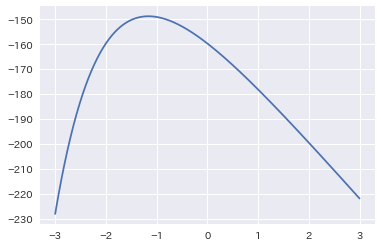

In [10]:
likelihood_ser = Series(list(likelihood_dict.values()), index=likelihood_dict.keys()).sort_index()

plt.plot(likelihood_ser.index, likelihood_ser.values)

In [11]:
print(likelihood_ser.max())
print(likelihood_ser.idxmax())
print(likelihood(X, y['time'], y['censor'], np.array([gender_param1, intercept1])))

-148.804765975
-1.162
-150.769222177


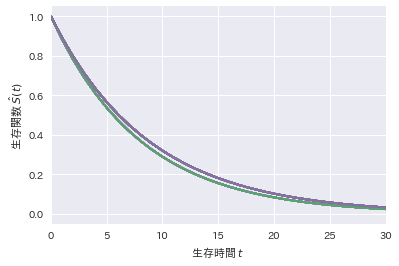

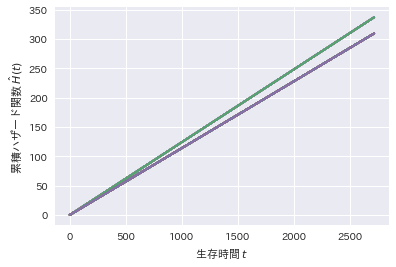

In [12]:
max_survival_time = whas100_df['追跡日数'].max()
time = np.arange(max_survival_time+1)

# 生存関数の描写
pred_survival_rate = estimator.predict_survival_function(whas100_df[teacher_cols], time)
pred_survival_rate.plot(legend=False)
plt.ylabel("生存関数 $\hat{S}(t)$")
plt.xlabel("生存時間 $t$")
plt.xlim(0, 30)
plt.show()

# 累積ハザード関数の描写
pred_cum_hazard_rate = estimator.predict_cumulative_hazard_function(whas100_df[teacher_cols], time)
pred_cum_hazard_rate.plot(legend=False)
plt.ylabel("累積ハザード関数 $\hat{H}(t)$")
plt.xlabel("生存時間 $t$")
plt.show()

In [3]:
whas100_df.head()

,登録日,追跡日,入院期間,追跡日数,生存状態,登録時年齢,性別,BMI
id,,,,,,,,
1,03/13/1995,03/19/1995,4,6,1,65,0,31.38134
2,01/14/1995,01/23/1996,5,374,1,88,1,22.65790
3,02/17/1995,10/04/2001,5,2421,1,77,0,27.87892
4,04/07/1995,07/14/1995,9,98,1,81,1,21.47878
5,02/09/1995,05/29/1998,4,1205,1,78,0,30.70601


In [8]:
whas100_df['gender×age'] = whas100_df['性別'] * whas100_df['登録時年齢']

In [9]:
teacher_cols = ['性別', '登録時年齢', 'gender×age', 'BMI', 'intercept']
X = whas100_df[teacher_cols]
y_arr = whas100_df.apply(lambda y: (y['生存状態'], y['追跡日数']), axis=1)
y = np.array(y_arr, dtype=[('censor', '?'), ('time', '<f8')])
y

array([( True,     6.), ( True,   374.), ( True,  2421.), ( True,    98.),
       ( True,  1205.), ( True,  2065.), ( True,  1002.), ( True,  2201.),
       ( True,   189.), (False,  2719.), (False,  2638.), ( True,   492.),
       ( True,   302.), (False,  2574.), (False,  2610.), (False,  2641.),
       ( True,  1669.), ( True,  2624.), (False,  2578.), (False,  2595.),
       ( True,   123.), (False,  2613.), ( True,   774.), ( True,  2012.),
       (False,  2573.), ( True,  1874.), (False,  2631.), ( True,  1907.),
       ( True,   538.), ( True,   104.), ( True,     6.), ( True,  1401.),
       ( True,  2710.), ( True,   841.), ( True,   148.), (False,  2137.),
       (False,  2190.), (False,  2173.), ( True,   461.), (False,  2114.),
       (False,  2157.), (False,  2054.), (False,  2124.), (False,  2137.),
       ( True,  2031.), (False,  2003.), (False,  2074.), ( True,   274.),
       (False,  1984.), (False,  1993.), (False,  1939.), ( True,  1172.),
       ( True,    89.), (

In [16]:
estimator = ExponentialRMSurvivalAnalysis()
estimator.fit(X, y)

print(estimator.score(X, y))

var_w = np.linalg.inv(-estimator.hessian)
se_w = np.sqrt(var_w)

summary = DataFrame(estimator.coef_, columns=['回帰係数'], index=teacher_cols)
summary['標準誤差'] = np.diag(se_w)
summary['z'] = summary['回帰係数']/summary['標準誤差']
summary

0.304780876494


/Users/taiyou/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


,回帰係数,標準誤差,z
性別,-4.572363,1.672575,-2.733727
登録時年齢,-0.064470,0.014566,-4.426067
gender×age,0.058511,0.022043,2.654447
BMI,0.104220,0.033503,3.110822
intercept,10.275479,1.500534,6.847881


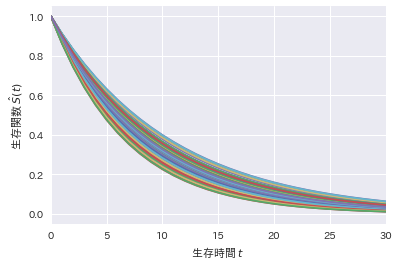

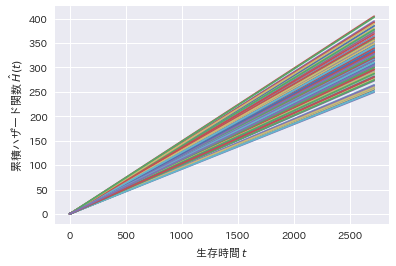

In [17]:
max_survival_time = whas100_df['追跡日数'].max()
time = np.arange(max_survival_time+1)

# 生存関数の描写
pred_survival_rate = estimator.predict_survival_function(whas100_df[teacher_cols], time)
pred_survival_rate.plot(legend=False)
plt.ylabel("生存関数 $\hat{S}(t)$")
plt.xlabel("生存時間 $t$")
plt.xlim(0, 30)
plt.show()

# 累積ハザード関数の描写
pred_cum_hazard_rate = estimator.predict_cumulative_hazard_function(whas100_df[teacher_cols], time)
pred_cum_hazard_rate.plot(legend=False)
plt.ylabel("累積ハザード関数 $\hat{H}(t)$")
plt.xlabel("生存時間 $t$")
plt.show()

---
## ワイブル回帰モデル
ワイブル分布
$$
f\left( t \right) =\frac { \lambda t^{ \lambda -1 } }{ { \theta  }^{ \lambda  } } exp\left[ -{ \left( \cfrac { t }{ \theta  }  \right)  }^{ 2 } \right]  \qquad (t \ge 0,\lambda > 0, \theta > 0)
$$

**<font color="blue">生存関数</font>**
$$
S\left( t \right) =exp\left[ -\left( \frac { t }{ \theta  }  \right) ^{ \lambda  } \right] 
$$

> $$
S\left(t\right) = 1-\int _{ 0 }^{ t }{ \frac { \lambda u^{ \lambda -1 } }{ { \theta  }^{ \lambda  } } exp\left[ -{ \left( \cfrac { u }{ \theta  }  \right)  }^{ \lambda  } \right] du } \\ =1-{ \left[ -exp\left[ -{ \left( \cfrac { u }{ \theta  }  \right)  }^{ \lambda  } \right]  \right]  }_{ 0 }^{ t }\\ =exp\left[ -{ \left( \cfrac { t }{ \theta  }  \right)  }^{ \lambda  } \right] 
$$

**<font color="blue">ハザード関数</font>**
$$
h\left( t \right) = \frac {f\left(t\right)}{S\left(t\right)} = \lambda t^{\lambda - 1}{\theta}^{-\lambda}
$$
 
---
**<font color="blue">Weibull回帰モデルのハザード関数</font>**:
上式のハザード関数に$\theta = exp\left( {\beta}_{0} + {\beta}_{1}x \right)$として
$$
h\left( t,x;\beta,\lambda \right) = \frac { \lambda t^{ \lambda -1 } }{ {\left( e^{ {\beta}_{0} + {\beta}_{1}x } \right)}^{ \lambda  } }  
$$
と一般化できる。ただし、便宜的に$\lambda = 1/\sigma$とする。このハザード関数は、比例ハザードモデル形式か、加速モデル形式で表すことができる。

**比例ハザードモデル形式**:
$$
h\left( t,x;\beta, \lambda \right) = \lambda t^{\lambda - 1} e^{-\lambda \left( {\beta}_{0} + {\beta}_{1}x \right)}\\
= \lambda t^{\lambda - 1} e^{- \lambda {\beta}_{0}}e^{- \lambda {\beta}_{1} x}
$$
となり、
$$
h\left( t,x;\beta ,\lambda  \right) =\lambda \gamma { t }^{ \lambda -1 }{ e }^{ -\lambda { \beta  }_{ 1 }x }\\
={ h }_{ 0 }\left( t \right) { e }^{ { \theta  }_{ 1 }x }
$$
となる。ただし

 - $\gamma = exp\left( - {\beta}_{0}/\sigma \right) = exp\left({\theta}_{0}\right)$
 - $\theta_{1} = - {\beta}_{1}/\sigma$
 
であり、基準ハザード関数は$h_{0}\left( t \right) = \lambda \gamma t^{\lambda - 1}$である。

 - パラメータ$\sigma$: 対数時間スケールでの分散型パラメータ
 - $\lambda = 1/\sigma$: 形状パラメータ
 - $\gamma$: 尺度パラメータ

**加速モデル形式**:
$$
h\left( t,x;\beta,\lambda \right) = \lambda t^{\lambda - 1}e^{-\lambda \left( {\beta}_{0} + {\beta}_{1}x \right)}\\
= \lambda \gamma \left( t e^{\beta_{1}x} \right)^{\lambda - 1}e^{-\beta_{1}x}
$$

二つのハザードモデルはパラメータ化の違いによるものである。比例ハザードモデルは$\theta$と$\sigma$を推定し、加速モデルでは$\beta$と$\sigma$を推定することになる。しかし、2つのパラメータの関係は$\theta = - \beta / \sigma$である。


**<font color="blue">比例ハザードモデル形式に対応する生存関数</font>**:
$$
S\left( t,x;\theta ,\sigma  \right) =exp\left\{ -t^{ \lambda  }\theta ^{ -\lambda  } \right\} \\ =exp\left\{ -t^{ \lambda  }e^{ -\lambda ({ \beta  }_{ 0 }+{ \beta  }_{ 1 }x) } \right\} \\ =exp\left\{ -t^{ (1/\sigma ) }e^{ -(1/\sigma )({ \beta  }_{ 0 }+{ \beta  }_{ 1 }x) } \right\} \\ =exp\left\{ -t^{ (1/\sigma ) }e^{ -({ \beta  }_{ 0 }/\sigma ) }e^{ -({ \beta  }_{ 1 }/\sigma )x } \right\} \\ =exp\left[ -t^{ \left( 1/\sigma  \right)  }e^{ \theta _{ 0 } }e^{ \theta _{ 1 }x } \right] 
$$

**<font color="blue">加速モデル形式に対応する生存関数</font>**:
$$
S\left( t,x;\beta ,\sigma  \right) =exp\left\{ -t^{ (1/\sigma ) }exp\left[ -(1/\sigma )(\beta _{ 0 }+\beta _{ 1 }x) \right]  \right\} 
$$


**最尤度推定式**:　ここでは、加速モデル形式におけるワイブル回帰モデルのパラメータ$\beta, \sigma$の推定を行うものとする。
まず、尤度関数を以下のように定義し、展開すると
$$
L\left( \beta, \sigma \right) = \prod _{i=1}^{n}{\left[ f\left( \beta, \sigma \right) \right]^{c_{i}} \cdot \left[ S\left( \beta, \sigma \right)\right]^{1-c_{i}}}\\
= \prod _{i=1}^{n}{ \left[ h\left( \beta,\sigma \right)S\left( \beta,\sigma \right) \right]^{c_{i}} \cdot \left[ S\left( \beta,\sigma \right) \right]^{1-c_{i}} }\\
= \prod _{i=1}^{n}{\left[ h\left( \beta,\sigma \right) \right]^{c_{i}} \cdot \left[S\left( \beta,\sigma \right)\right]}\\
\log {L\left( \beta, \sigma \right)} = \sum _{i=1}^{n}{\left\{ c_{i}\log {h\left( \beta,\sigma \right)} + \log {S\left( \beta, \sigma \right)}\right\}}
$$
のようになる。この尤度関数に加速モデル形式のハザード関数と加速モデル形式の生存関数を代入し、展開する。
$$
\log { L\left( \beta ,\sigma  \right)  } =\sum _{ i=1 }^{ n }{ \left\{ { c }_{ i }\left[ -\log { \sigma  } +\left( \lambda -1 \right) \log { { t }_{ i } } -\lambda { X }_{ i }^{ \prime  }\beta  \right] -{ t }_{ i }^{ \lambda  }exp\left[ \left( -1/\sigma  \right) { X }_{ i }^{ \prime  }\beta  \right]  \right\}  } \\ =\sum _{ i=1 }^{ n }{ \left\{ { c }_{ i }\left[ -\log { \sigma  } +\left( \cfrac { 1 }{ \sigma  } -1 \right) \log { { t }_{ i } } -\cfrac { 1 }{ \sigma  } { X }_{ i }^{ \prime  }\beta  \right] -{ t }_{ i }^{ 1/\sigma  }exp\left[ \left( -1/\sigma  \right) { X }_{ i }^{ \prime  }\beta  \right]  \right\}  } \\ =\sum _{ i=1 }^{ n }{ \left\{ { c }_{ i }\left[ -\log { \sigma  } -\log { { t }_{ i } } +\cfrac { \log { { t }_{ i } } -{ X }_{ i }^{ \prime  }\beta  }{ \sigma  }  \right] -{ e }^{ (1/\sigma )\log { { t }_{ i } }  }{ e }^{ \left( -1/\sigma  \right) { X }_{ i }^{ \prime  }\beta  } \right\}  } \\ =\sum _{ i=1 }^{ n }{ \left\{ { c }_{ i }\left[ -\log { \sigma  } -{ y }_{ i }+{ z }_{ i } \right] -{ e }^{ { z }_{ i } } \right\}  } \qquad \left( { z }_{ i }=\cfrac { { y }_{ i }-{ X }_{ i }^{ \prime  }\beta  }{ \sigma  }  \right) 
$$
そして、上式を各パラメータ$\beta, \sigma$で偏微分し、0とおく。
$$
\frac { \partial \log { L }  }{ \partial \beta_{j}  } =\sum _{ i=1 }^{ n }{ \left\{ -\frac { x_{ ij } }{ \sigma  } \left[ c_{ i }-e^{ \frac { y_{ i }-X_{ i }^{ \prime  }\beta  }{ \sigma  }  } \right]  \right\}  } =0
$$
$$
\frac { \partial \log { L }  }{ \partial \sigma  } =-\frac { m }{ \sigma  } +\sum _{ i=1 }^{ n }{ -\frac { y_{ i }-X_{ i }^{ \prime  }\beta  }{ { \sigma  }^{ 2 } } \left[ c_{ i }-e^{ \frac { y_{ i }-X_{ i }^{ \prime  }\beta  }{ \sigma  }  } \right]  } =0
$$
上式の自然対数尤度を最大にするには、ラプラス・ニュートン法を用いて行う。

2回偏微分した式は以下の通り。
$$
\frac { { \partial  }^{ 2 }\log { L }  }{ { \partial { \beta  }_{ j } }{ \partial { \beta  }_{ k } } } =\sum _{ i=1 }^{ n }{ \cfrac { { x }_{ ij } }{ \sigma  } { e }^{ { z }_{ i } }\cdot -\cfrac { { x }_{ ik } }{ \sigma  }  } \\ \qquad \qquad =-\frac { 1 }{ { \sigma  }^{ 2 } } \sum _{ i=1 }^{ n }{ { x }_{ ij }{ x }_{ ik }{ e }^{ { z }_{ i } } } 
$$
$$
\frac { { \partial  }^{ 2 }\log { L }  }{ { \partial { \beta  }_{ j } }{ \partial \sigma  } } =-\frac { 1 }{ { \sigma  }^{ 2 } } \sum _{ i=1 }^{ n }{ { x }_{ ij }{ z }_{ i }{ e }^{ { z }_{ i } } } 
$$
$$
\frac { { \partial  }^{ 2 }\log { L }  }{ { { \partial \sigma  } }^{ 2 } } =-\frac { m }{ { \sigma  }^{ 2 } } -\frac { 1 }{ { \sigma  }^{ 2 } } \sum _{ i=1 }^{ n }{ { { z }_{ i } }^{ 2 }{ e }^{ { z }_{ i } } } 
$$
<br>

パラメータベクトル<br>
$\beta = \left( \beta_{1}, \beta_{2}, \cdots, \beta_{p}, \sigma \right)$<br>
対数尤度の勾配ベクトル<br>
$\nabla \log { L } =\left( \frac { { \partial  }\log { L }  }{ \partial \beta _{ 1 } } ,\cdots ,\frac { { \partial  }\log { L }  }{ \partial \beta _{ p } } ,\frac { { \partial  }\log { L }  }{ \partial \sigma  }  \right) $<br>
ヘッセ行列<br>
$H=\begin{bmatrix} { \partial  }^{ 2 }\log { L } /{ \partial \beta _{ 1 } }^{ 2 } & { \partial  }^{ 2 }\log { L } /\partial \beta _{ 1 }\partial \beta _{ 2 } & \cdots  & { \partial  }^{ 2 }\log { L } /\partial \beta _{ 1 }\partial \beta _{ p } & { \partial  }^{ 2 }\log { L } /\partial \beta _{ 1 }\partial \sigma  \\ { \partial  }^{ 2 }\log { L } /\partial \beta _{ 2 }\partial \beta _{ 1 } & { \partial  }^{ 2 }\log { L } /{ \partial \beta _{ 2 } }^{ 2 } & \cdots  & { \partial  }^{ 2 }\log { L } /\partial \beta _{ 2 }\partial \beta _{ p } & { \partial  }^{ 2 }\log { L } /\partial \beta _{ 2 }\partial \sigma  \\ \vdots  & \vdots  & \ddots  & \vdots  & \vdots  \\ { \partial  }^{ 2 }\log { L } /\partial \beta _{ p }\partial \beta _{ 1 } & { \partial  }^{ 2 }\log { L } /\partial \beta _{ p }\partial \beta _{ 2 } & \cdots  & { \partial  }^{ 2 }\log { L } /{ \partial \beta _{ p } }^{ 2 } & { \partial  }^{ 2 }\log { L } /\partial \beta _{ p }\partial \sigma  \\ { \partial  }^{ 2 }\log { L } /\partial \sigma \partial \beta _{ 1 } & { \partial  }^{ 2 }\log { L } /\partial \sigma \partial \beta _{ 2 } & \cdots  & { \partial  }^{ 2 }\log { L } /\partial \sigma \partial \beta _{ p } & { \partial  }^{ 2 }\log { L } /{ \partial \sigma  }^{ 2 } \end{bmatrix}$<br>
尚、ニュートン法のアルゴリズムは指数回帰モデルで示したので、ここでは省略する。

**<font color="blue">情報行列</font>**:
![](./imgs/Weibull回帰モデルの情報行列.png)

**<font color="blue">回帰係数の共分散行列の推定値</font>**:
![](./imgs/Weibull回帰モデルの回帰係数の共分散行列.png)

**<font color="blue">標準誤差の推定量</font>**:
$$
\widehat {SE}\left( \hat {\beta}, \hat {\sigma} \right) = \sqrt {\widehat { Var } \left( \hat { \beta  } ,\hat { \sigma  }  \right) }
$$

In [40]:
import warnings

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from scipy.linalg import solve
from sklearn.base import BaseEstimator
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils.validation import check_is_fitted

from sksurv.base import SurvivalAnalysisMixin #評価関数
from sksurv.functions import StepFunction
from sksurv.nonparametric import _compute_counts #リスク集合の数を算出
from sksurv.util import check_arrays_survival


class WeibullRMOptimizer(object):
    """Partial log-likelihood of Weibull Regression Model"""

    def __init__(self, X, event, time, alpha):
        # sort descending
        o = np.argsort(-time, kind="mergesort")
        self.x = X[o, :]
        self.event = event[o]
        self.time = time[o]
        self.alpha = alpha

    def update(self, parameters, offset=0):
        """Compute gradient and Hessian matrix with respect to `w`."""
        x = self.x
        n_samples, n_features = x.shape

        gradient = np.zeros((1, n_features+1), dtype=float)
        hessian = np.zeros((n_features+1, n_features+1), dtype=float)

        w = parameters[:-1]
        sigma = parameters[-1]

        grad_list = []
        for j in range(w.shape[0]):
            grad_list.append(self._dw_logL(w, sigma, j))
        grad_list.append(self._dsigma_logL(w, sigma))
        grad_logL = np.array(grad_list)

        for j in range(w.shape[0]):
            for k in range(w.shape[0]):
                hessian[j][k] = self._dwdw_logL(w, sigma, j, k)
            hessian[j][-1] = self._dwdsigma_logL(w, sigma, j)

        for k in range(w.shape[0]):
            hessian[-1][k] = self._dwdsigma_logL(w, sigma, k)
        hessian[-1][-1] = self._dsigmadsigma_logL(w, sigma)

        self.gradient = grad_logL
        self.hessian = hessian

        return self

    def _smart_search(self, minimizing_function, n, *args):
        from scipy.optimize import fmin_powell
        x = np.ones(n)
        return fmin_powell(minimizing_function, x, args=args, disp=False)

    def _negative_log_likelihood(self, w_sigma, time, event):
        if np.any(w_sigma < 0):
            return np.inf
        x = self.x
        w = w_sigma[:-1]
        sigma = w_sigma[-1]

        logL = 0
        z = (np.log(time) - np.dot(x, w))/sigma
        logL_ser = event*(-np.log(sigma) - np.log(time) + z) - np.exp(z)
        logL = log_ser.sum()
        return logL

    def _dw_logL(self, w, sigma, j):
        x = self.x
        time = self.time
        dw_logL = 0
        z = (np.log(time) - np.dot(x, w))/sigma
        event = np.where(self.event, 1, 0)
        dw_logL_ser = -(x[:, j]/sigma)*(event - np.exp(z))
        dw_logL = dw_logL_ser.sum()
        return dw_logL

    def _dsigma_logL(self, w, sigma):
        x = self.x
        v = 0
        m = self.event[self.event == 1].shape[0]
        
        time = self.time
        event = np.where(self.event, 1, 0)
        z = (np.log(time) - np.dot(x, w))/sigma
        dsigma_logL_ser = (z/sigma)*(event - np.exp(z))
        return -(m/sigma) - dsigma_logL_ser.sum()

    def _dwdw_logL(self, w, sigma, j, k):
        x = self.x
        v = 0
        
        time = self.time
        z = (np.log(time) - np.dot(x, w))/sigma
        v_ser = x[:, j]*x[:, k]*np.exp(z)
        v = v_ser.sum()
        return -(1/sigma**2)*v

    def _dwdsigma_logL(self, w, sigma, j):
        x = self.x
        v = 0
        
        time = self.time
        event = np.where(self.event, 1, 0)
        z = (np.log(time) - np.dot(x, w))/sigma
        v_ser = x[:, j]*z*np.exp(z)
        v = v_ser.sum()
        return -v/(sigma**2)

    def _dsigmadsigma_logL(self, w, sigma):
        x = self.x
        m = self.event[self.event == 1].shape[0]

        v = 0
        time = self.time
        evnet = np.where(self.event, 1, 0)
        z = (np.log(time) - np.dot(x, w))/sigma
        v_ser = (z**2)*np.exp(z)
        v = v_ser.sum()
        return -m/(sigma**2) - v/(sigma**2)

class WeibullRMSurvivalAnalysis(BaseEstimator, SurvivalAnalysisMixin):
    """Weibull Regression Model. Uses Newton-Raphson optimization.

    Parameters
    ----------
    alpha : float, optional, default: 0
        Regularization parameter for ridge regression penalty.
    n_iter : int, optional, default: 100
        Maximum number of iterations.
    tol : float, optional, default: 1e-9
        Convergence criteria. Convergence is based on the negative log-likelihood::
        |1 - (new neg. log-likelihood / old neg. log-likelihood) | < tol
    verbose : int, optional, default: 0
        Specified the amount of additional debug information
        during optimization.

    Attributes
    ----------
    coef_ : ndarray, shape = (n_features,)
        Coefficients of the model
    lambda_: float, Parameter of the model

    References
    ----------
    .. [1] Daivid W. Hosmer and Stanley Lemeshow , Susanne May[2014]
                    『APPLIED SURVIVAL ANALYSIS. Second Edition』(P.271-289)
    """

    def __init__(self, alpha=0, n_iter=100, tol=1e-9, verbose=0):
        self.alpha = alpha
        self.n_iter = n_iter
        self.tol = tol
        self.verbose = verbose

    def fit(self, X, y):
        """Minimize negative partial log-likelihood for provided data.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Data matrix
        y : structured array, shape = (n_samples,)
            A structured array containing the binary event indicator
            as first field, and time of event or time of censoring as
            second field.

        Returns
        -------
        self
        """
        X, event, time = check_arrays_survival(X, y)

        if self.alpha < 0:
            raise ValueError("alpha must be positive, but was %r" % self.alpha)

        optimizer = WeibullRMOptimizer(X, event, time, self.alpha)

        verbose = self.verbose
        n_params = X.shape[1]+1
        parameters = np.zeros(n_params)
        parameters[-1] = 0.5 # sigmaは分母として用いるので0
        parameters_prev = parameters
        i = 0
        while True:
            if i >= self.n_iter:
                if verbose > 0:
                    print("iter {:>6d}: reached maximum number of iterations. Stopping.".format(i + 1))
                warnings.warn(
                    ('Optimization did not converge: Maximum number of iterations has been exceeded.'),
                    stacklevel=2, category=ConvergenceWarning
                )
                break

            optimizer.update(parameters)
            delta = solve(optimizer.hessian, optimizer.gradient,
                          overwrite_a=False, overwrite_b=False, check_finite=False)

            if not np.all(np.isfinite(delta)):
                raise ValueError("search direction contains NaN or infinite values")

            parameters_new = parameters - delta

            if verbose > 2:
                print("iter {:>6d}: update = {}".format(i + 1, delta))
            if verbose > 1:
                print("iter {:>6d}: loss = {:.10f}".format(i + 1, loss_new))

            parameters_prev = parameters
            parameters = parameters_new

            res = np.abs(delta)
            if np.all(res < self.tol):
                break
            else:
                i += 1

        self.coef_ = parameters[:-1]
        self.sigma_ = parameters[-1]
        self.hessian = optimizer.hessian
        self.gradient = optimizer.gradient
        return self

    def predict(self, X):
        """Predict failed time.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Data matrix.
        Returns
        -------
        xw_ : array, shape = (n_samples,)
            Predicted risk scores.
        """
        check_is_fitted(self, "coef_")

        X = np.atleast_2d(X)

        return np.dot(X, self.coef_)

    def hazard_at_times(self, X, times):
        """
        特徴量xと時間tからハザード値を算出

        Parameters
        ----------
        X: array-like, shape = (n_samples, n_features)
            Data matrix.
        times: array-like, shape = (n_times, )
            Data matrix.

        Returns
        -------
        survival : ndarray, shape = (n_times, n_samples)
            Predicted survival functions.
        """
        lambda_ = 1/self.sigma_
        xw_ = self.predict(X)
        n_samples = xw_.shape[0]
        n_times = times.shape[0]
        hazard_arr = np.zeros((n_times, n_samples), dtype=float)

        for i in range(0, n_times):
            t = times[i]
            hazard_arr[i] = lambda_*t**(lambda_ - 1)*np.exp(-lambda_*xw_)
        return hazard_arr

    def predict_survival_function(self, X, times):
        """
        特徴量xと時間tから生存確率を算出

        Parameterås
        ----------
        X: array-like, shape = (n_samples, n_features)
            Data matrix.
        times: array-like, shape = (n_times, )
            Data matrix.

        Returns
        -------
        survival : ndarray, shape = (n_times, n_samples)
            Predicted survival functions.
        """
        lambda_ = 1/self.sigma_
        xw_ = self.predict(X)
        n_samples = xw_.shape[0]
        n_times = times.shape[0]
        survival_arr = np.zeros((n_times, n_samples), dtype=float)

        for i in range(0, n_times):
            t = times[i]
            survival_arr[i] = np.exp(-(t**lambda_)*np.exp(-lambda_*xw_))
        return survival_arr

    def predict_cumulative_hazard_function(self, X, times):
        return - np.log(self.predict_survival_function(X, times))

In [34]:
teacher_cols = ['性別', '登録時年齢', 'gender×age', 'BMI', 'intercept']
X = whas100_df[teacher_cols]
y_arr = whas100_df.apply(lambda y: (y['生存状態'], y['追跡日数']), axis=1)
y = np.array(y_arr, dtype=[('censor', '?'), ('time', '<f8')])
y

array([( True,     6.), ( True,   374.), ( True,  2421.), ( True,    98.),
       ( True,  1205.), ( True,  2065.), ( True,  1002.), ( True,  2201.),
       ( True,   189.), (False,  2719.), (False,  2638.), ( True,   492.),
       ( True,   302.), (False,  2574.), (False,  2610.), (False,  2641.),
       ( True,  1669.), ( True,  2624.), (False,  2578.), (False,  2595.),
       ( True,   123.), (False,  2613.), ( True,   774.), ( True,  2012.),
       (False,  2573.), ( True,  1874.), (False,  2631.), ( True,  1907.),
       ( True,   538.), ( True,   104.), ( True,     6.), ( True,  1401.),
       ( True,  2710.), ( True,   841.), ( True,   148.), (False,  2137.),
       (False,  2190.), (False,  2173.), ( True,   461.), (False,  2114.),
       (False,  2157.), (False,  2054.), (False,  2124.), (False,  2137.),
       ( True,  2031.), (False,  2003.), (False,  2074.), ( True,   274.),
       (False,  1984.), (False,  1993.), (False,  1939.), ( True,  1172.),
       ( True,    89.), (

In [41]:
weibull_model = WeibullRMSurvivalAnalysis()
weibull_model.fit(X, y)

WeibullRMSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0)

In [13]:
var_w = np.linalg.inv(-weibull_model.hessian)
se_w = np.sqrt(var_w)

summary = DataFrame(weibull_model.coef_, columns=['回帰係数'], index=teacher_cols)
summary['標準誤差'] = np.diag(se_w)[:-1]
summary['z値'] = summary['回帰係数']/summary['標準誤差']
summary

/Users/taiyou/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


,回帰係数,標準誤差,z値
性別,-4.689452,2.284832,-2.052428
登録時年齢,-0.063940,0.020628,-3.099718
gender×age,0.059154,0.030422,1.944471
BMI,0.105510,0.046476,2.270233
intercept,9.872683,2.047008,4.822983


In [14]:
sigma_df = DataFrame(np.array([weibull_model.sigma_]), columns=['回帰係数'], index=['σ'])
sigma_df['標準誤差'] = np.diag(se_w)[-1]
sigma_df

,回帰係数,標準誤差
σ,1.252874,0.155629


In [15]:
max_survival_time = whas100_df['追跡日数'].max()
time = np.arange(max_survival_time+1)

weibull_model.predict_survival_function(X, time)

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.99925781,  0.99668963,  0.998162  , ...,  0.99370554,
         0.99942953,  0.99896552],
       [ 0.99870976,  0.99425068,  0.99680609, ...,  0.98908011,
         0.99900822,  0.99820185],
       ..., 
       [ 0.66436131,  0.161012  ,  0.36303823, ...,  0.03087674,
         0.73030806,  0.56549482],
       [ 0.6642815 ,  0.16092564,  0.36293019, ...,  0.03084522,
         0.73024063,  0.56540013],
       [ 0.66420172,  0.16083934,  0.36282218, ...,  0.03081372,
         0.73017322,  0.56530547]])

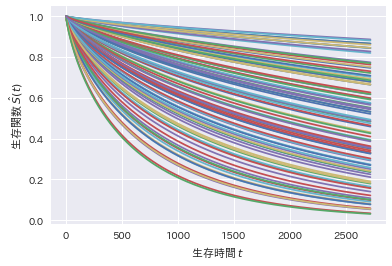

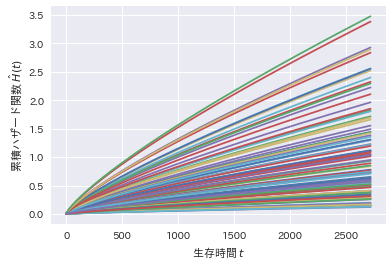

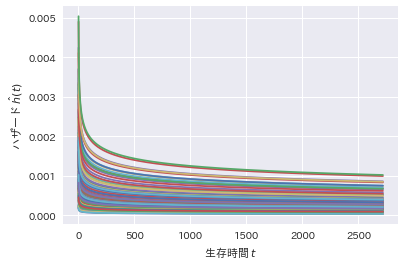

In [24]:
max_survival_time = whas100_df['追跡日数'].max()
time = np.arange(max_survival_time+1)

# 生存関数の描写
pred_survival_arr = weibull_model.predict_survival_function(whas100_df[teacher_cols], time)
pred_survival_rate = DataFrame(pred_survival_arr)
pred_survival_rate.plot(legend=False)
plt.ylabel("生存関数 $\hat{S}(t)$")
plt.xlabel("生存時間 $t$")
plt.show()

# 累積ハザード関数の描写
pred_cum_hazard_arr = weibull_model.predict_cumulative_hazard_function(whas100_df[teacher_cols], time)
pred_cum_hazard_rate = DataFrame(pred_cum_hazard_arr)
pred_cum_hazard_rate.plot(legend=False)
plt.ylabel("累積ハザード関数 $\hat{H}(t)$")
plt.xlabel("生存時間 $t$")
plt.show()

# ハザード関数の描写
time = np.arange(1, max_survival_time+1)
hazards = weibull_model.hazard_at_times(X, time)
hazard_df = DataFrame(hazards, index=time, columns=X.index)
hazard_df.plot(legend=False)
plt.ylabel("ハザード $\hat{h}(t)$")
plt.xlabel("生存時間 $t$")
plt.show()

---
## 層別ワイブル回帰モデル
指数分布はワイブル分布の形状パラメータλが1のときの分布であり、ワイブル分布を一般化した分布である。そのため、これ以降はワイブル分布のみを扱う。

層別ワイブル回帰モデルの尤度関数は、
$$
L_{p}\left( \beta, \sigma \right) = \prod _{s=1}^{S}{L_{sp}\left( \beta, \sigma \right)} \qquad (s=1,2, \cdots, S)
$$
と定義し、上式に自然対数をとると以下の式になる。
$$
\log {L_{p}\left( \beta, \sigma \right)} = \sum _{s=1}^{S}{\log {L_{sp}\left( \beta, \sigma \right)}}\\
= \sum _{ s=1 }^{ S }{ \sum _{ i=1 }^{ { n }_{ s } }{ \left\{ { c }_{ si }\left[ -\log { \sigma  } -y_{ si }+z_{ si } \right] -e^{ z_{ si } } \right\}  }  } \quad ({ y }_{ si }=\log { t_{ si } } ,z_{ si }=\frac { y_{ si }-X^{ \prime  }_{ si }\beta  }{ \sigma  } )
$$

 - $n_{s}$: $s$番目の層の観測値の数
 - $t_{si}$: $s$層$i$番目の時間データ
 - $c_{si}$: 時間$t_{si}$での打ち切り(0 or 1)
 - $X_{si}$: $p$次元の特徴量ベクトル
 
対数尤度関数をそれぞれのパラメータ$\beta, \sigma$で微分した式を以下に示す。
$$
\frac { \partial \log { L_{ p } }  }{ \partial \beta _{ j } } =\sum _{ s=1 }^{ S }{ \sum _{ i=1 }^{ n_{ s } }{ -\frac { x_{ s(ij) } }{ { \sigma  }^{ 2 } } \left[ { c }_{ si }-{ e }^{ { z }_{ si } } \right]  }  } \\ 
\frac { \partial \log { L_{ p } }  }{ \partial \sigma  } =\sum _{ s=1 }^{ S }{ \left\{ -\frac { { m }_{ s } }{ \sigma  } +\sum _{ i=1 }^{ { n }_{ s } }{ -\frac { z_{ si } }{ \sigma  } \left[ { c }_{ si }-{ e }^{ { z }_{ si } } \right]  }  \right\}  } 
$$

2回微分した式は以下の通りである。
$$
\frac { { \partial  }^{ 2 }\log { L_{ p } }  }{ \partial \beta _{ j }\partial \beta _{ k } } =\sum _{ s=1 }^{ S }{ \left\{ -\frac { 1 }{ { \sigma  }^{ 2 } } \sum _{ i=1 }^{ n_{ s } }{ { x }_{ s(ij) }{ x }_{ s(ik) }{ e }^{ { z }_{ si } } }  \right\}  } \\ \frac { { \partial  }^{ 2 }\log { L_{ p } }  }{ \partial \beta _{ j }\partial \sigma  } =\sum _{ s=1 }^{ S }{ \left\{ -\frac { 1 }{ { \sigma  }^{ 2 } } \sum _{ i=1 }^{ n_{ s } }{ { x }_{ s(ij) }z_{ si }{ e }^{ { z }_{ si } } }  \right\}  } \\ \frac { { \partial  }^{ 2 }\log { L_{ p } }  }{ { \partial \sigma  }^{ 2 } } =\sum _{ s=1 }^{ S }{ \left\{ -\frac { { m }_{ s } }{ { \sigma  }^{ 2 } } -\frac { 1 }{ { \sigma  }^{ 2 } } \sum _{ i=1 }^{ n_{ s } }{ z_{ si }{ e }^{ { z }_{ si } } }  \right\}  } 
$$

 - $m_{s}$: $s$層のイベント観測数

上記の式をもとに勾配ベクトル・ヘッセ行列を構成し、ニュートン法を用いて、パラメータを導出する。

In [194]:
import warnings

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from scipy.linalg import solve
from sklearn.base import BaseEstimator
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils.validation import check_is_fitted

from sksurv.base import SurvivalAnalysisMixin #評価関数
from sksurv.functions import StepFunction
from sksurv.nonparametric import _compute_counts #リスク集合の数を算出
from sksurv.util import check_arrays_survival


class WeibullRMOptimizer(object):
    """Partial log-likelihood of Weibull Regression Model"""

    def __init__(self, X, event, time, alpha):
        # sort descending
        o = np.argsort(-time, kind="mergesort")
        self.x = X[o, :]
        self.event = event[o]
        self.time = time[o]
        self.alpha = alpha

    def update(self, parameters, offset=0):
        """Compute gradient and Hessian matrix with respect to `w`."""
        x = self.x
        n_samples, n_features = x.shape

        gradient = np.zeros((1, n_features+1), dtype=float)
        hessian = np.zeros((n_features+1, n_features+1), dtype=float)

        w = parameters[:-1]
        sigma = parameters[-1]

        grad_list = []
        for j in range(w.shape[0]):
            grad_list.append(self._dw_logL(w, sigma, j))
        grad_list.append(self._dsigma_logL(w, sigma))
        gradient = np.array(grad_list)

        for j in range(w.shape[0]):
            for k in range(w.shape[0]):
                hessian[j][k] = self._dwdw_logL(w, sigma, j, k)
            hessian[j][-1] = self._dwdsigma_logL(w, sigma, j)

        for k in range(w.shape[0]):
            hessian[-1][k] = self._dwdsigma_logL(w, sigma, k)
        hessian[-1][-1] = self._dsigmadsigma_logL(w, sigma)

        self.gradient = gradient
        self.hessian = hessian

        return self

    def _smart_search(self, minimizing_function, n, *args):
        from scipy.optimize import fmin_powell
        x = np.ones(n)
        return fmin_powell(minimizing_function, x, args=args, disp=False)

    def _negative_log_likelihood(self, w_sigma, time, event):
        if np.any(w_sigma < 0):
            return np.inf
        x = self.x
        w = w_sigma[:-1]
        sigma = w_sigma[-1]

        logL = 0
        for i in range(x.shape[0]):
            t = time[i]
            c = event[i]
            z = (np.log(t) - np.dot(x[i], w))/sigma
            logL += c*(-np.log(sigma) - np.log(t) + z) - np.exp(z)
        return logL

    def _dw_logL(self, w, sigma, j):
        x = self.x
        dw_logL = 0
        for i in range(x.shape[0]):
            t = self.time[i]
            c = 1 if self.event[i] == True else 0
            z = (np.log(t) - np.dot(x[i], w))/sigma
            dw_logL += -(x[i,j]/sigma)*(c - np.exp(z))
        return dw_logL

    def _dsigma_logL(self, w, sigma):
        x = self.x
        v = 0
        m = self.event[self.event == 1].shape[0]

        for i in range(x.shape[0]):
            t = self.time[i]
            c = 1 if self.event[i] == True else 0
            z = (np.log(t) - np.dot(x[i], w))/sigma
            v += (z/sigma)*(c - np.exp(z))
        return -(m/sigma) - v

    def _dwdw_logL(self, w, sigma, j, k):
        x = self.x
        v = 0
        for i in range(x.shape[0]):
            t = self.time[i]
            z = (np.log(t) - np.dot(x[i], w))/sigma
            v += x[i,j]*x[i,k]*np.exp(z)
        return -(1/sigma**2)*v

    def _dwdsigma_logL(self, w, sigma, j):
        x = self.x
        v = 0
        for i in range(x.shape[0]):
            t = self.time[i]
            c = 1 if self.event[i] == True else 0
            z = (np.log(t) - np.dot(x[i], w))/sigma
            v += x[i,j]*z*np.exp(z)
        return -v/(sigma**2)

    def _dsigmadsigma_logL(self, w, sigma):
        x = self.x
        m = self.event[self.event == 1].shape[0]

        v = 0
        for i in range(x.shape[0]):
            t = self.time[i]
            c = 1 if self.event[i] == True else 0
            z = (np.log(t) - np.dot(x[i], w))/sigma
            v += (z**2)*np.exp(z)
        return -m/(sigma**2) - v/(sigma**2)

class WeibullRMSurvivalAnalysis(BaseEstimator, SurvivalAnalysisMixin):
    """Weibull Regression Model. Uses Newton-Raphson optimization.

    Parameters
    ----------
    alpha : float, optional, default: 0
        Regularization parameter for ridge regression penalty.
    n_iter : int, optional, default: 100
        Maximum number of iterations.
    tol : float, optional, default: 1e-9
        Convergence criteria. Convergence is based on the negative log-likelihood::
        |1 - (new neg. log-likelihood / old neg. log-likelihood) | < tol
    verbose : int, optional, default: 0
        Specified the amount of additional debug information
        during optimization.

    Attributes
    ----------
    coef_ : ndarray, shape = (n_features,)
        Coefficients of the model
    lambda_: float, Parameter of the model

    References
    ----------
    .. [1] Daivid W. Hosmer and Stanley Lemeshow , Susanne May[2014]
                    『APPLIED SURVIVAL ANALYSIS. Second Edition』(P.271-289)
    """

    def __init__(self, alpha=0, n_iter=100, tol=1e-9, verbose=0, strata=None):
        self.alpha = alpha
        self.n_iter = n_iter
        self.tol = tol
        self.verbose = verbose
        self.strata = strata

    def fit(self, X, y):
        """Minimize negative partial log-likelihood for provided data.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Data matrix
        y : structured array, shape = (n_samples,)
            A structured array containing the binary event indicator
            as first field, and time of event or time of censoring as
            second field.

        Returns
        -------
        self
        """
        if self.alpha < 0:
            raise ValueError("alpha must be positive, but was %r" % self.alpha)

        verbose = self.verbose
        if self.strata is None:
            n_params = X.shape[1]+1
        else:
            n_params = X.shape[1] + 1 - len(self.strata)
        parameters = np.zeros(n_params)
        parameters[-1] = 0.5 # sigmaは分母として用いるので0
        parameters_prev = parameters
        i = 0
        while True:
            if i >= self.n_iter:
                if verbose > 0:
                    print("iter {:>6d}: reached maximum number of iterations. Stopping.".format(i + 1))
                warnings.warn(
                    ('Optimization did not converge: Maximum number of iterations has been exceeded.'),
                    stacklevel=2, category=ConvergenceWarning
                )
                break

            if self.strata is None:
                X, event, time = check_arrays_survival(X, y)

                optimizer = WeibullRMOptimizer(X, event, time, self.alpha)
                optimizer.update(parameters)
                hessian_new = optimizer.hessian
                gradient_new = optimizer.gradient
            else:
                gradient_new = np.zeros(n_params, dtype=float)
                hessian_new = np.zeros((n_params, n_params), dtype=float)

                X['y'] = y.tolist()
                X_strata = X.set_index(self.strata)
                for strata in np.unique(X_strata.index):
                    target_X = X_strata.loc[[strata], X_strata.columns.drop('y')]
                    target_y = np.array(
                        X_strata.loc[[strata]]['y'].values,
                        dtype=[('event', '?'), ('time', '<f8')]
                        )
                    X_s, event_s, time_s = check_arrays_survival(target_X, target_y)
                    optimizer = WeibullRMOptimizer(X_s, event_s, time_s, self.alpha)
                    optimizer.update(parameters)
                    gradient_new += optimizer.gradient
                    hessian_new += optimizer.hessian


            delta = solve(hessian_new, gradient_new,
                          overwrite_a=False, overwrite_b=False, check_finite=False)

            if not np.all(np.isfinite(delta)):
                raise ValueError("search direction contains NaN or infinite values")

            parameters_new = parameters - delta

            if verbose > 2:
                print("iter {:>6d}: update = {}".format(i + 1, delta))
            if verbose > 1:
                print("iter {:>6d}: loss = {:.10f}".format(i + 1, loss_new))

            parameters_prev = parameters
            parameters = parameters_new

            res = np.abs(delta)
            if np.all(res < self.tol):
                break
            else:
                i += 1

        self.coef_ = parameters[:-1]
        self.sigma_ = parameters[-1]
        self.hessian = hessian_new
        self.gradient = gradient_new
        return self

    def predict(self, X):
        """Predict failed time.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Data matrix.
        Returns
        -------
        xw_ : array, shape = (n_samples,)
            Predicted risk scores.
        """
        check_is_fitted(self, "coef_")

        X = np.atleast_2d(X)

        return np.dot(X, self.coef_)

    def hazard_at_times(self, X, times):
        """
        特徴量xと時間tからハザード値を算出

        Parameters
        ----------
        X: array-like, shape = (n_samples, n_features)
            Data matrix.
        times: array-like, shape = (n_times, )
            Data matrix.

        Returns
        -------
        survival : ndarray, shape = (n_times, n_samples)
            Predicted survival functions.
        """
        lambda_ = 1/self.sigma_
        xw_ = self.predict(X)
        n_samples = xw_.shape[0]
        n_times = times.shape[0]
        hazard_arr = np.zeros((n_times, n_samples), dtype=float)

        for i in range(0, n_times):
            t = times[i]
            hazard_arr[i] = lambda_*t**(lambda_ - 1)*np.exp(-lambda_*xw_)
        return hazard_arr

    def predict_survival_function(self, X, times):
        """
        特徴量xと時間tから生存確率を算出

        Parameterås
        ----------
        X: array-like, shape = (n_samples, n_features)
            Data matrix.
        times: array-like, shape = (n_times, )
            Data matrix.

        Returns
        -------
        survival : ndarray, shape = (n_times, n_samples)
            Predicted survival functions.
        """
        lambda_ = 1/self.sigma_
        xw_ = self.predict(X)
        n_samples = xw_.shape[0]
        n_times = times.shape[0]
        survival_arr = np.zeros((n_times, n_samples), dtype=float)

        for i in range(0, n_times):
            t = times[i]
            survival_arr[i] = np.exp(-(t**lambda_)*np.exp(-lambda_*xw_))
        return survival_arr

    def predict_cumulative_hazard_function(self, X, times):
        return - np.log(self.predict_survival_function(X, times))

In [200]:
teacher_cols = ['性別', '登録時年齢', 'gender×age', 'BMI', 'intercept']
X = whas100_df[teacher_cols]
y_arr = whas100_df.apply(lambda y: (y['生存状態'], y['追跡日数']), axis=1)
y = np.array(y_arr, dtype=[('censor', '?'), ('time', '<f8')])
y

array([( True,     6.), ( True,   374.), ( True,  2421.), ( True,    98.),
       ( True,  1205.), ( True,  2065.), ( True,  1002.), ( True,  2201.),
       ( True,   189.), (False,  2719.), (False,  2638.), ( True,   492.),
       ( True,   302.), (False,  2574.), (False,  2610.), (False,  2641.),
       ( True,  1669.), ( True,  2624.), (False,  2578.), (False,  2595.),
       ( True,   123.), (False,  2613.), ( True,   774.), ( True,  2012.),
       (False,  2573.), ( True,  1874.), (False,  2631.), ( True,  1907.),
       ( True,   538.), ( True,   104.), ( True,     6.), ( True,  1401.),
       ( True,  2710.), ( True,   841.), ( True,   148.), (False,  2137.),
       (False,  2190.), (False,  2173.), ( True,   461.), (False,  2114.),
       (False,  2157.), (False,  2054.), (False,  2124.), (False,  2137.),
       ( True,  2031.), (False,  2003.), (False,  2074.), ( True,   274.),
       (False,  1984.), (False,  1993.), (False,  1939.), ( True,  1172.),
       ( True,    89.), (

In [196]:
weibull_model = WeibullRMSurvivalAnalysis(strata=['性別'])
weibull_model.fit(X, y)

/Users/taiyou/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel_launcher.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


WeibullRMSurvivalAnalysis(alpha=0, n_iter=100, strata=['性別'], tol=1e-09,
             verbose=0)

In [197]:
var_w = np.linalg.inv(-weibull_model.hessian)
se_w = np.sqrt(var_w)

summary = DataFrame(weibull_model.coef_, columns=['回帰係数'], index=['登録時年齢', 'gender×age', 'BMI', 'intercept'])
summary['標準誤差'] = np.diag(se_w)[:-1]
summary['z値'] = summary['回帰係数']/summary['標準誤差']
summary

/Users/taiyou/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


,回帰係数,標準誤差,z値
登録時年齢,-0.045806,0.017086,-2.680826
gender×age,-0.002048,0.004981,-0.411135
BMI,0.087952,0.045620,1.927920
intercept,9.006371,1.894116,4.754921


In [198]:
sigma_df = DataFrame(np.array([weibull_model.sigma_]), columns=['回帰係数'], index=['σ'])
sigma_df['標準誤差'] = np.diag(se_w)[-1]
sigma_df

,回帰係数,標準誤差
σ,1.264033,0.157492


---
## 時間依存性Weibull回帰モデル